In [1]:
import numpy as np
from findiff import FinDiff
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [2]:
# The grid in space and time:
dx    = 0.002                      # spatial separation
x     = np.arange(0, 20, dx)       # spatial grid points
dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2    # final time
ts = np.arange(t0, tf, dt) 



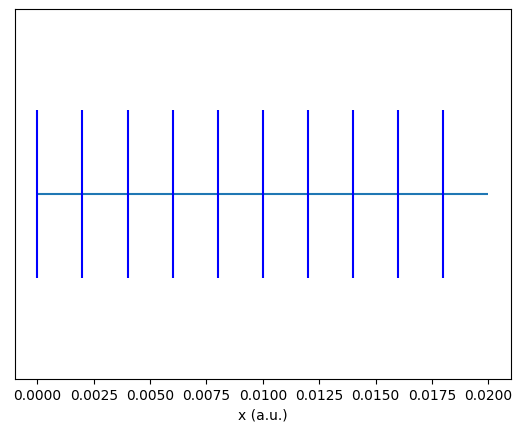

In [3]:
# plot x range
plt.figure()

plt.hlines(1,x[0],x[10])  # Draw a horizontal line
plt.eventplot(x[0:10], orientation='horizontal', colors='b')
plt.yticks([])
plt.xlabel("x (a.u.)")
plt.show()


Initial Wavefunction
\\[
A=\frac{1}{\sigma \sqrt{\pi}}
\\]

\\[
\psi=A e^{\frac{-\left(x-x_{0}\right)^{2}}{2 \sigma^{2}}} e^{+i k_x x}
\\]

In [4]:
kx    = 20                         # wave number
m     = 1                          # mass
sigma = 0.1                        # width of initial gaussian wave-packet
x0    = 3.0                        # center of initial gaussian wave-packet

A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

# Initial Wavefunction
psi = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * kx * x)

Plot of initial wave function

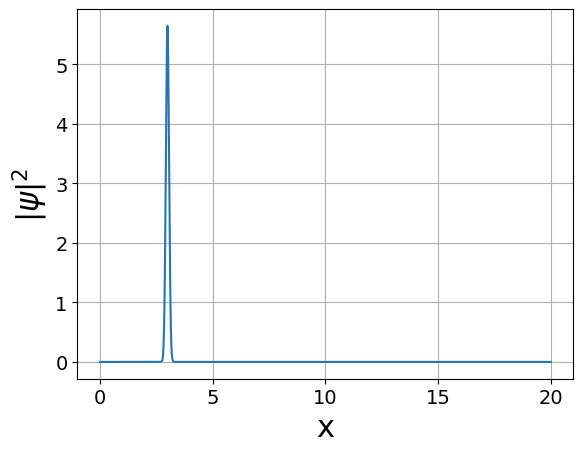

In [5]:
fig = plt.figure()
plt.rcParams["axes.labelsize"] = 22
plt.rc('font', size=14)  
ax = fig.gca()
ax.set_xlabel('x')
ax.set_ylabel(r'$|\psi|^2$')
ax.grid()
ax.plot(x, np.abs(psi)**2)

# Solving Schrödinger equation with finite differences: 

More information on this approach: https://blog.cupcakephysics.com/computational%20physics/2014/11/02/the-finite-difference-method-and-schrodingers-equation.html

In [6]:

# The discretized Hamiltonian as a sparse matrix:
# atomic units:
hbar=1
m=1
Delta=FinDiff(0, x[1] - x[0], 2, acc=2).matrix(x.shape)
# Periodic boundary conditions
Delta[-1,0]=1
Delta[0,-1]=1

H = -0.5 *hbar/m* Delta

print(H.toarray())

# Here, an additional potential can be added
from scipy.sparse import diags

#Free particle
V=0*x
# Potential of a harmonic oscillator
#V=0.5*x**2

#Potential of a particle in a box
H=H+diags(V)

print(H.toarray())

[[-2.50e+05  6.25e+05 -5.00e+05 ...  0.00e+00  0.00e+00 -5.00e-01]
 [-1.25e+05  2.50e+05 -1.25e+05 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00 -1.25e+05  2.50e+05 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00 ...  2.50e+05 -1.25e+05  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 ... -1.25e+05  2.50e+05 -1.25e+05]
 [-5.00e-01  0.00e+00  0.00e+00 ... -5.00e+05  6.25e+05 -2.50e+05]]
[[-2.50e+05  6.25e+05 -5.00e+05 ...  0.00e+00  0.00e+00 -5.00e-01]
 [-1.25e+05  2.50e+05 -1.25e+05 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00 -1.25e+05  2.50e+05 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00 ...  2.50e+05 -1.25e+05  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 ... -1.25e+05  2.50e+05 -1.25e+05]
 [-5.00e-01  0.00e+00  0.00e+00 ... -5.00e+05  6.25e+05 -2.50e+05]]


C:\Users\jgeorge\Miniconda3\envs\sgl_teaching\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


\\[
 \frac{\partial}{\partial t} \psi(t)=-iH  \psi(t)
\\]

In [7]:
# Solve time dependent Schrödinger equation
def psi_t(t, psi):
    return -1j * H.dot(psi)

sol = solve_ivp(psi_t, t_span = [t0,tf], 
                                y0 = psi, 
                                t_eval = ts,
                                method="RK23")

MovieWriter ffmpeg unavailable; using Pillow instead.


0.9999999999999998
0.9999999999999998
0.999944437525964
0.9998958180757173
0.9998947660384432
0.9998946790831876
0.9998946443618554
0.9998946304291537
0.9998946274646086
0.9998946267383678
0.9998946260072561
0.9998946252399707
0.9998946253992222
0.9998946254004774
0.9998946248157792
0.9998946250240451
0.9998946250538325
0.9998946245575461
0.9998946248410242
0.9998946248006612
0.9998946243900939
0.99989462476398
0.9998946245961878
0.9998946243040996
0.9998946247472851
0.9998946244236518
0.9998946242985142
0.9998946247475857
0.9998946242854834
0.9998946243702583
0.9998946247259646
0.9998946241955359
0.9998946245080332
0.9998946246714384
0.9998946241712688
0.999894624690249
0.9998946245934847
0.9998946242273115
0.9998946248857264
0.9998946245122222
0.9998946243711437
0.9998946250571197
0.9998946244531208
0.9998946246005216
0.9998946251708597
0.99989462444236
0.9998946249027916
0.9998946252260921
0.9998946245030329
0.9998946252555517
0.9998946252405172
0.9998946246523815
0.9998946256287239

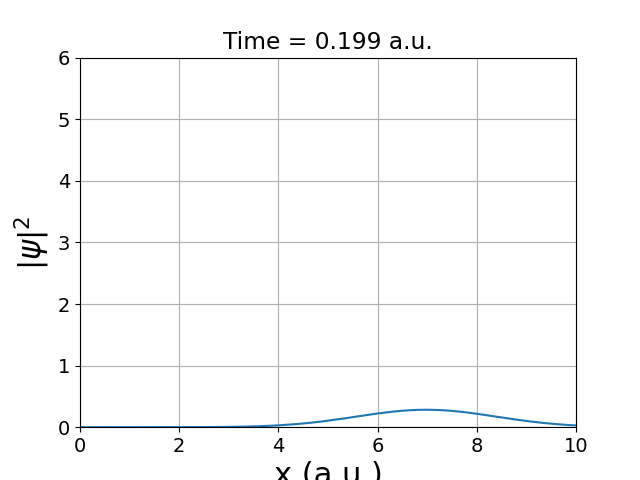

In [8]:
%matplotlib widget
from matplotlib import animation

fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
ax1.set_xlabel('x (a.u.)')
ax1.set_ylabel(r'$|\psi|^2$')
ax1.grid()
title = ax1.set_title('')
line1, = ax1.plot([], [])


def animate(i):
    line1.set_data(x, np.abs(sol.y[:,i])**2)
    print(np.sum(np.abs(sol.y[:,i])**2)*(dx)) 
    title.set_text('Time = {0:1.3f} a.u.'.format(sol.t[i]))
    return line1


anim = animation.FuncAnimation(fig, animate,
                               frames=len(sol.t), interval=50, blit=True)
anim.save("Broadening_Gaussian_wave_packet.gif")